In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import the image dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
# (60000, 28, 28, 1) - for samples, width, height, channels respectively
x_train.shape

(60000, 28, 28)

In [9]:
single_image = x_train[0]

In [11]:
single_image.shape

(28, 28)

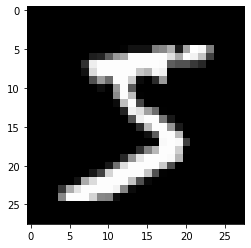

In [14]:
plt.imshow(single_image, cmap='gray')

In [16]:
# y_train is the numbers that x represents
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train.shape

(60000,)

In [19]:
# one-hot-encoded for each value in y_train

In [20]:
y_example = to_categorical(y_train)

In [22]:
y_example.shape

(60000, 10)

In [23]:
#Now row representation
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [25]:
y_cat_train = to_categorical(y_train, 10)

In [27]:
single_image.max()

255

In [29]:
single_image.min()

0

In [30]:
#Now scale the data
x_train = x_train/255

In [31]:
x_test = x_test/255

In [32]:
scaled_image = x_train[0]

In [34]:
scaled_image.max()

1.0

In [36]:
#Reshape the data
# batch size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [37]:
# 10000 images in test set
x_test = x_test.reshape(10000, 28, 28, 1)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [42]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(4,4),
                strides = (1,1), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# After adding layers above - flatten out the image to array
model.add(Flatten())
#Then add dense
model.add(Dense(128, activation='relu'))

#Output layer -- 10 neurons for each class, SOFTMAX - because this is a multiclass problem
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [43]:
# hyperparameters - the one that depends on dataset - input_shape, activation = 'softmax', model.add(Flatten)
# experiments hyperparameters = activation functions, Dense neuron counts

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [46]:
model.fit(x_train, y_cat_train, epochs=10, validation_data = (x_test, y_cat_test),
        callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 224us/sample - loss: 0.1377 - accuracy: 0.9581 - val_loss: 0.0597 - val_accuracy: 0.9794
Epoch 2/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.0459 - accuracy: 0.9861 - val_loss: 0.0479 - val_accuracy: 0.9846
Epoch 3/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0438 - val_accuracy: 0.9860
Epoch 4/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.0392 - val_accuracy: 0.9875
Epoch 5/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0418 - val_accuracy: 0.9878
Epoch 6/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0383 - val_accuracy: 0.9887
Epoch 7/10
60000/60000 [====================

In [47]:
metrics = pd.DataFrame(model.history.history)

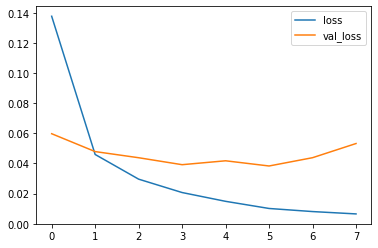

In [51]:
metrics[['loss', 'val_loss']].plot()

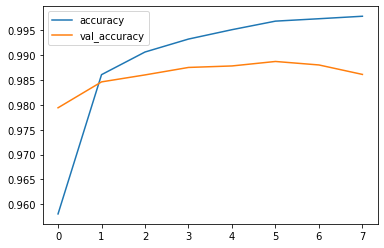

In [52]:
metrics[['accuracy', 'val_accuracy']].plot()

In [53]:
model.metrics_names

['loss', 'accuracy']

In [54]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.05321662126878455, 0.9861]

In [55]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
predictions = model.predict_classes(x_test)

In [57]:
y_cat_test.shape

(10000, 10)

In [58]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.97      0.99      0.98       958
           7       1.00      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [60]:
confusion_matrix(y_test, predictions)

array([[ 962,    1,    2,    1,    0,    0,   12,    0,    2,    0],
       [   0, 1128,    2,    0,    0,    0,    2,    0,    3,    0],
       [   0,    2, 1021,    2,    0,    0,    1,    2,    4,    0],
       [   0,    0,    3,  998,    0,    3,    0,    1,    3,    2],
       [   0,    0,    1,    0,  966,    0,    6,    0,    1,    8],
       [   1,    1,    0,    2,    0,  881,    5,    0,    1,    1],
       [   0,    2,    0,    0,    1,    2,  951,    0,    2,    0],
       [   1,    3,    8,    1,    1,    0,    0, 1003,    5,    6],
       [   2,    2,    1,    1,    0,    0,    2,    0,  964,    2],
       [   1,    2,    0,    2,    8,    1,    0,    2,    6,  987]],
      dtype=int64)

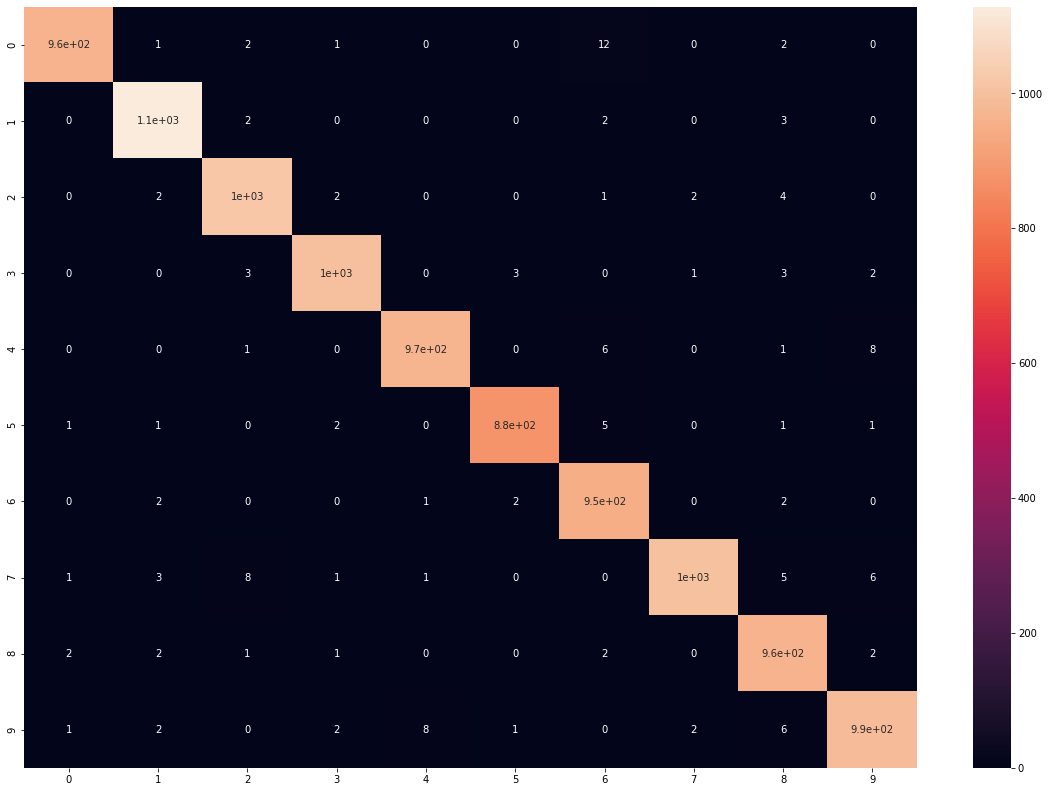

In [64]:
import seaborn as sns
plt.figure(figsize=(20,14))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [65]:
my_number = x_test[0]

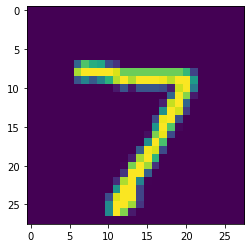

In [66]:
plt.imshow(my_number.reshape(28,28))

In [67]:
model.predict_classes(my_number.reshape(1, 28, 28, 1))

array([7], dtype=int64)